<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Review CLT, Confidence Intervals, and Hypothesis Testing

_Authors: Matt Brems (DC)_

---

### Read in the housing data (code provided).

You can find the original data [here](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data).

In [32]:
import urllib

names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]

import pandas as pd
data = pd.read_csv("./datasets/housing.data", header=None, names=names, delim_whitespace=True)

NOX = data['NOX'].values
AGE = data['AGE'].values

### 1. Find the mean, standard deviation, and the standard error of the mean for variable `AGE`

In [33]:
import numpy as np

In [34]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [35]:
# A:
mean_age=np.mean(data['AGE'])
std_age=np.std(data['AGE'])
se_age=std_age/(np.sqrt(len(data['AGE'])))

In [36]:
print(mean_age,std_age,se_age)

68.57490118577078 28.121032570236885 1.25013238257


### 2. Generate a 90%, 95%, and 99% confidence interval for the mean value of `AGE`

You can use the `scipy.stats.t.interval` function to calculate confidence interval range.

```python
# Endpoints of the range that contains alpha percent of the distribution
stats.t.interval(alpha, df, loc=0, scale=1)	
```

Arguments:
- `df` = the degrees of freedom, will be the length of the vector -1.
- `loc` = the mean of the t-distribution (your point estimate - mean of the variable)
- `scale` = the standard deviation of the t-distribution (the standard error of your sample mean)

**Interpret the results from all three confidence intervals.**

In [37]:
from scipy.stats import t
import scipy.stats as stats

In [38]:
# A:
df=len(data['AGE'])-1
print('95% CI ',stats.t.interval(0.95,df,loc=mean_age, scale=se_age))

95% CI  (66.118800298936975, 71.031002072604593)


In [39]:

print('90% CI ',stats.t.interval(0.9,df,loc=mean_age, scale=se_age))

90% CI  (66.51483732549255, 70.634965046049004)


In [40]:

print('99% CI ',stats.t.interval(0.99,df,loc=mean_age, scale=se_age))

99% CI  (65.342559174207366, 71.807243197334202)


### 3. Did you rely on the Central Limit Theorem in question 2? Why or why not? Explain.

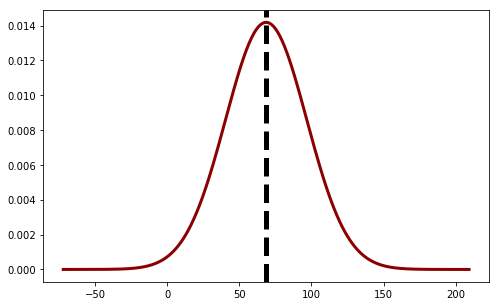

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

# A:
xpoints=np.linspace(mean_age-5*std_age,mean_age+5*std_age,500)
ypoints = stats.norm.pdf(xpoints,mean_age,std_age)
fig = plt.figure(figsize=(8,5))

# get the current "axis" out of the figure
ax = fig.gca()

# plot the lines using matplotlib's plot function:
ax.plot(xpoints, ypoints, linewidth=3, color='darkred')
ax.axvline(mean_age, color='black', linestyle='--', lw=5)

### 4. For variable `NOX`, generate a 95% confidence interval for the mean and interpret it.

In [42]:
# A:
mean_nox=np.mean(data['NOX'])
std_nox=np.std(data['NOX'])
se_nox=std_nox/(np.sqrt(len(data['NOX'])))
conf=0.95

In [43]:
z = np.abs(stats.norm.ppf((1-conf)/2))
z

1.959963984540054

In [44]:
lower = mean_nox - z * se_nox
upper = mean_nox + z * se_nox
print(lower, upper)

0.544608500164 0.564781618413


In [45]:
stats.t.interval(0.95,len(data['NOX'])-1,loc=mean_nox, scale=se_nox)

(0.54458426802571469, 0.56480585055135979)

### 5. For the variable `NOX`, test the hypothesis that the mean is equal to the median. 

You may use scipy functions to complete this, but complete all steps listed below.

1. Define hypothesis
2. Set alpha, the confidence threshold (Let alpha = 0.05)
3. Calculate point estimate, i.e. sample mean
4. Calculate test statistic
5. Find the p-value
6. Interpret results

In [46]:
# A:
median_nox=np.median(data['NOX'])
print(mean_nox,median_nox,std_nox,se_nox)

0.5546950592885372 0.538 0.11576311540656153 0.00514629819923


H0: mean = median
H1: mean is not equal to median

In [47]:
t_stat=(median_nox-mean_nox)/se_nox

In [48]:
t_stat

-3.244090925596617

In [52]:
2*stats.t.cdf(t_stat,df=len(data['NOX'])-1)

0.0012562860356566429

In [50]:
len(data['NOX'])

506

p-value<0.05, Reject the null hypothesis, concludes that the mean is not equal to median.



### 6. What do you notice about the results from Exercise 4 and Exercise 5? 

**If you were going to generalize this to the relationship between hypothesis tests and confidence intervals, what might you say? Be specific.**

In [54]:
# A:
print(median_nox)
print(lower, upper)
##median_nox = 0.538 is not in 95% confidence interval. 

0.538
0.544608500164 0.564781618413


### 7. For the variable `NOX`, test the hypothesis that the mean is greater than or equal to the median. 

You may use scipy functions to complete this, but complete all steps listed below.

1. Define hypothesis
2. Set alpha (Let alpha = 0.05)
3. Calculate point estimate
4. Calculate test statistic
5. Find the p-value
6. Interpret results

In [60]:
# A:
#H0: MEDIAN < MEAN 
#H1: MEDIAN >= MEAN
print(t_stat)
stats.t.cdf(t_stat,df=len(data['NOX'])-1)

-3.2440909256


0.00062814301782832145

In [ ]:
#p-value = 0.000628, reject the null hypothesis, conclude that the mean is smaller than the median. 

### 8. Compare the p-values from Exercise 5 and Exercise 7. What do you notice?

In [ ]:
# A:
# p-value from Exercise 5 is two times more than Exercise 7.
# Exercise 5 is two-tailed. Exercise 7 is one tailed.